<a href="https://colab.research.google.com/github/aurora32s/python_study/blob/master/2022%EB%85%84_1%EC%9B%94_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연산자 끼워넣기(14888번)

## 문제
N개의 수로 이루어진 수열 A1, A2, ..., AN이 주어진다. 또, 수와 수 사이에 끼워넣을 수 있는 N-1개의 연산자가 주어진다. 연산자는 덧셈(+), 뺄셈(-), 곱셈(x), 나눗셈(÷)으로만 이루어져 있다.

우리는 수와 수 사이에 연산자를 하나씩 넣어서, 수식을 하나 만들 수 있다. 이 떄, 주어진 수의 순서를 바꾸면 안된다.

예를 들어, 6개의 수로 이루어진 수열이 1,2,3,4,5,6이고, 주어진 연산자가 뎃셈(+1) 2개, 뺄셈(-) 1개, 곱셈(x) 1개, 나눗셈(÷) 1개인 경우에는 총 60가지의 식을 만들 수 있다. 예를 들어, 아래와 같은 식을 만들 수 있다.
- 1+2+3-4x5÷6
- 1÷2+3+4-5x6
- 1+2÷3x4-5+6
- 1÷2x3-4+5+6

식의 계산은 연산자 우선 순위를 무시하고 앞에서부터 진행해야 한다. 또 나눗셈은 정수 나눗셈으로 몫만 취한다. 음수를 양수로 나눌 때는 C++ 14의 기준을 따른다. 즉, 양수로 바꾼 뒤 몫을 취하고, 그 몫을 음수로 바꾼 것과 같다. 이에 따라서, 위의 식 4개의 결과를 계산해보면 아래와 같다.
- 1+2+3-4x5÷6 = 1
- 1÷2+3+4-5x6 = 12
- 1+2÷3x4-5+6 = 5
- 1÷2x3-4+5+6 = 7

N개의 수와 N-1개의 연산자가 주어졌을 때, 만들 수 있는 식의 결과가 최대인 것과 최소인 것을 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 수의 개수 N(2<=N<=11)가 주어진다. 둘째 줄에는 A1, A2, ..., A이 주어진다. (1<=Ai<=100) 셌재 줄에는 합이 N-1인 4개의 정수가 주어진다. 차례대로 뎃셈(+1)의 개수, 뺄셈(-)의 개수, 곱셈(x)의 개수, 나눗셈(÷)의 개수이다.

## 출력
첫째 줄에 만들 수 있는 식의 결과의 최댓값을, 둘째 줄에는 최솟값을 출력한다. 연산자를 어떻게 끼워넣어도 항상 -10억보다 크거나 같고, 10억보다 작거나 같은 결과가 나오는 입력만 주어진다. 또한, 앞에서부터 계산했을 때, 중간에 계산되는 식의 결과도 항상 -10억보다 크거나 같고, 10억보다 작거나 같다.

In [ ]:
n = int(input()) # 수의 개수
numbers = list(map(int, input().split())) # n개의 수
operator = list(map(int, input().split())) # 연산자의 개수

maxValue = int(1e9) * -1 - 1 # 최대값
minValue = int(1e9) + 1 # 최솟값

def calculator (a, b, index) : # 피연산자, 연산자 index
  if index == 0 : # 덧셈
    return a+b
  elif index == 1 : # 뺄셈
    return a-b
  elif index == 2 : # 곱셈
    return a*b
  else : # 나눗셈
    result = 0
    if a < 0 and b > 0 : result = (abs(a) // b) * -1
    else : result = a//b
    return result # 나눗셈(정수 나눗셈으로 몫만 취한다.)

def solve(result, index) : # 지금까지 결과, 숫자 index
  global maxValue, minValue
  if index == n : # 모든 숫자 계산 완료
    maxValue = max(maxValue, result)
    minValue = min(minValue, result)
    return
  
  for op in range(4) : # 각 연산자 중 개수가 1개 이상인 연산자만 계산 후 전달
    if operator[op] > 0 :
      operator[op] -= 1
      solve(calculator(result, numbers[index], op), index + 1)
      operator[op] += 1

solve(numbers[0], 1)
print(maxValue)
print(minValue)

2
5 6
0 0 1 0
30
30


In [ ]:
maxValue

54

In [ ]:
minValue

-24

# 괄호의 값(2504번)

## 문제
4개의 기호 '(', ')', '[', ']' 를 이용해서 만들어지는 괄호열 중에서 올바른 괄호열이란 다음과 같이 정의된다.
1. 한 쌍의 괄호로만 이루어진 '()'와 '[]'는 올바른 괄호열이다.
2. 만일 x가 올바른 괄호열이면 '(x)'이나 '[x]'도 모두 올바른 괋호열이 된다.
3. x와 y 모두 올바른 괄호열이라면 이들을 결합한 x,y도 올바른 괄호열이 된다.

예를 들어, '(()[[]])'나 '(())[][]'는 올바른 괄호열이지만 '([)]'나 '(()()[]'은 모두 올바른 괄호열이 아니다. 우리는 어떤 올바른 괄호열 x에 대하여 그 괄호열의 값(괄호값)을 아래와 같이 정의하고 값(x)로 표시한다.
1. '()'인 괄호열의 값은 2이다.
2. '[]'인 괄호열의 값은 3이다.
3. '(x)'의 괄호값은 2 * 값(x)으로 계산된다.
4. '[x]'의 괄호값은 3 * 값(x)으로 계산된다.
5. 올바른 괄호열 x와 y가 결합된 xy의 괄호값은 값(xy) = 값(x) + 값(y)로 계산된다.

예를 들어 '(()[[]])([])'의 괄호값을 구해보자. '()[[]]'의 괄호값이 2 + 3 * 3 = 11이므로 '(()[[]])'의 괄호값은 2 * 11 = 22이다. 그리고 '([])'의 값은 2 * 3 = 6이므로, 전체 괄호열의 값은 22 + 6 = 28이다.

여러분이 풀어야 할 문제는 주어진 괄호열을 읽고, 그 괄호값을 앞에서 정의한대로 계산하여 출력하는 것이다.

## 입력
첫째 줄에 괄호열을 나타내는 문자열(스트링)이 주어진다. 단 그 길이는 1이상, 30 이하이다.

## 출력
첫째 줄에 그 괄호열의 값을 나타내는 정수를 출력한다. 만일 입력이 올바르지 못한 괄호열이면 반드시 0을 출력해야 한다.


In [ ]:
l = input()

stack = list()
answer = 0
tmp = 1

for i in range(len(l)) :
  if l[i] == '(' :
    stack.append('(')
    tmp *= 2
  elif l[i] == '[' :
    stack.append('[')
    tmp *= 3
  elif l[i] == ')' :
    if not stack or stack[-1] == '[' :
      answer = 0
      break
    if l[i-1] == '(' : # 가장 안쪽 쌍에서만 answer에 더해준다.
      answer += tmp
    stack.pop()
    tmp //= 2
  elif l[i] == ']' :
    if not stack or stack[-1] == '(' :
      answer = 0
      break
    if l[i-1] == '[' : # 가장 안쪽 쌍에서만 answer에 더해준다.
      answer += tmp
    stack.pop()
    tmp //= 3

if stack :
  print(0)
else :
  print(answer)

[][]((])
0


# 빗물(14719번)

## 문제
2차원 세계에 블록이 쌓여있다. 비가 오면 블록 사이에 빗물이 고인다.

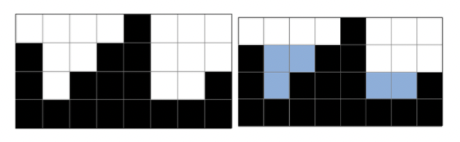

비는 충분히 많이 온다. 고이는 빗물의 총량은 얼마일까?

## 입력
첫 번째 줄에는 2차원 세계의 세로 길이 H와 2차원 세계의 가로길이 W가 주어진다. (1<=H,W<=500)

두 번쨰 줄에는 블록이 쌓인 높이를 의미하는 0이상 H 이하의 정수가 2차원 세계의 맨 왼쪽 위치부터 차례대로 W개 주어진다.

따라서 블록 내부의 빈 공간이 생길 수 없다. 또 2차원 세계의 바닥은 항상 막혀있다고 가정하여도 좋다.

## 출력
2차원 세계에서는 한 칸의 용량은 1이다. 고이는 빗물의 총량을 출력하여라. 빗물이 전혀 고이지 않을 경우 0을 출력하여라.

In [ ]:
h, w = map(int, input().split()) # 높이, 넓이
heights = list(map(int, input().split())) # 각 높이

answer = 0
for i in range(1, w-1) :
  max_left = max(heights[:i])
  max_right = max(heights[i+1:])

  height = min(max_left, max_right)

  if heights[i] < height :
    answer += (height - heights[i])

print(answer)

3 5
0 0 0 2 0
0


In [ ]:
heights

[0, 0, 0, 2, 0]

# 가르침(1062번)

## 문제
남극에 사는 김지민 선생님은 학생들이 되도록이면 많은 단어를 읽을 수 있도록 하려고 한다. 그러나 지구온난화로 인해 얼음이 녹아서 곧 학교가 무너지기 때문에, 김지민은 K개의 글자를 가르칠 시간 밖에 없다. 김지민이 가르치고 난 후에는, 학생들은 그 K개의 글자로만 이루어진 단어만을 읽을 수 있다. 김지민은 어떤 K개의 글자를 가르쳐야 학생들이 읽을 수 있는 단어의 개수가 최대가 되는지 고민에 빠졌다.

남극언어의 모든 단어는 "anta"로 시작되고, "tica"로 끝난다. 남극언어에 단어는 N개 밖에 없다고 가정한다. 학생들이 읽을 수 있는 단어의 최댓값을 구하는 프로그램을 작성하시오.

## 입력
첫쨰 줄에 단어의 개수 N과 K가 주어진다. N은 50보다 작거나 같은 자연수이고, K는 26보다 작거나 같은 자연수 또는 0이다. 둘째 줄부터 N개의 줄에 남극 언어의 단어가 주어진다. 단어는 영어 소문자로만 이루어져 있고, 길이가 8보다 크거나 같고, 15보다 작거나 같다. 모든 단어는 중복되지 않는다.

## 출력
첫째 줄에 김지민이 K개의 글자를 가르칠 떄, 학생들이 읽을 수 있는 단어의 개수의 최댓값을 출력한다.

## [ 배열 사용하면 시간 초과 발생 ]
1. int형은 4byte(=32bit) 이므로 0부터 (2^32 - 1)까지 표현할 수 있다. -> 비트마스크 사용 시, int로 커버 가능

2. 비트마스크를 이용한 집합 구현
- 하나의 bit가 하나의 원소를 의미
- N bit 정수 변수라면 N개의 원소를 갖는 집합의 부분집합들을 모두 표현할 수 있다.

(1) 공집합 : a = 0

(2) 꽉찬 집합 : a = (1<<n)-1

(3) 원소 추가 : a |= (1<<k)

(4) 원소 삭제 : a &= ~(1<<k)

(5) 원소의 포함 여부 확인 : if (a & (1<<k))

(6) 원소의 토글 : a ^= (1<<k)

(7) 두 집합에 대해서 연산
  - a|b : 합집합
  - a&b : 교집합
  - a&(~b) : 차집합
  - a^b : a와 b중 하나에만 포함된 원소들의 집합

(8) 집합의 크기 구하기
  - java : Integer.bitCount(A)

(9) 최소 원소 찾기 : int first = a & (-a)

(10) 최소 원소 지우기 : a &= (a-1)

(11) 모든 부분 집합 순회하기
  - for (int subset = a ; subset ; subset = ((subset-1)&a)){}

In [ ]:
from itertools import combinations

n, k = map(int, input().split()) # 단어의 개수, 배울 수 있는 알파벳의 개수

if k < 5 :
  print(0)
else :
  k -= 5
  need_chars = {'a','n','t','i','c'}
  input_chars = []
  alphabet = {ky : v for v, ky in enumerate(
      (set(map(chr, range(ord('a'), ord('z') + 1))) - need_chars))}
  
  answer = 0
  for _ in range(n) :
    tmp = 0
    for c in set(input()) - need_chars :
      tmp |= (1 << alphabet[c]) # 각 알파벳에 해당하는 bit를 켜준다.
    input_chars.append(tmp) # 비트마스크 저장
  
  filter = (2**i for i in range(21)) # 26개 알파벳에서 필수 5개를 제외
  count = 0
  for comb in combinations(filter, k) : # filter에서 k개의 원소만 뽑아낸 모든 조합
    test = sum(comb) # 새롭게 배운 알파벳의 조합(비트마스크)
    count = 0
    for word in input_chars :
      if test & word == word : # 해당 단어의 포함된 bit가 모두 test에 있다면
        count += 1
    
    answer = max(answer, count)
  print(answer)

9 8
antabtica
antaxtica
antadtica
antaetica
antaftica
antagtica
antahtica
antajtica
antaktica
3


# 멀티탭 스케줄링(1700번)

## 문제
기숙사에서 살고 있는 준규는 한 개의 멀티탭을 이용하고 있다. 준규는 키보드, 헤어드라이기, 핸드폰 충전기, 디지털 카메라 충전기 등 여러 개의 전기용품을 사용하면서 어쩔 수 없이 각종 전기용품의 플러그를 뺐다 꽂았다 하는 불편함을 겪고 있다. 그래서 준규는 자신의 생활 패턴을 분석하여, 자기가 사용하고 있는 전기용품의 사용순서를 알아내었고, 이를 기반으로 플러그를 빼는 횟수를 최소화하는 방법을 고안하여 보다 쾌적한 생활환경을 만들려고 한다.

예를 들어 3구(구멍이 세 개 달린) 멀티탭을 쓸 때, 전기용품의 사용 순서가 아래와 같이 주어진다면,
1. 키보드
2. 헤어드라이기
3. 핸드폰 충전기
4. 디지털 카메라 충전기
5. 키보드
6. 헤어드라이기

키보드, 헤어드라이기, 핸드폰 충전기의 플러그를 순서대로 멀티탭에 꽂은 다음 디지털 카메라 충전기 플러그를 꽂기 전에 핸드폰 충전기 플러그를 빼는 것이 최적일 것이므로 플러그는 한 번만 빼면 된다.

## 입력
첫 줄에는 멀티탭 구멍의 개수 N(1<=N<=100)과 전기 용품의 총 사용횟수 K(1<=K<=100)가 정수로 주어진다. 두 번째 줄에는 전기용품의 이름이 K 이하의 자연수로 사용 순서대로 주어진다. 각 줄의 모든 정수 사이에는 공백 문자로 구분 되어 있다.

## 출력
하나씩 플러그를 빼는 최소의 횟수를 출력하시오.

- 현재 꼽아야 하는 전기용품을 기준으로 가장 나중에 다시 사용하게 될 전기용품을 뽑아야 한다.

In [ ]:
n, k = map(int, input().split()) # n : 멀티탭 구멍의 개수, k : 전기 용품의 총 사용횟수
multi = list(map(int, input().split())) # 전기용품 사용 순서

answer = 0
plugs = []
for idx, i in enumerate(multi) :
  # 1. 해당 전기용품이 이미 꽂혀 있는 경우
  if i in plugs : continue
  # 2. 멀티탭에 자리가 비어있는 경우
  if len(plugs) < n :
    plugs.append(i)
    continue
  # 3. 멀티탭에 자리가 없어 하나를 뽑아야 하는 경우
  answer += 1
  removeItem = 0
  tmp = idx
  for idy, j in enumerate(plugs) :
    try :
      # j에 해당하는 전자용품이 다시 사용되는 경우
      if tmp < multi.index(j, idx+1) :
        tmp = multi.index(j, idx+1)
        removeItem = idy
    except :
      # j에 해당하는 전자용품이 다시는 사용되지 않는 경우
      removeItem = idy
      break
  plugs[removeItem] = i

print(answer)  

2 7
2 3 2 3 1 2 7
2


# 부분합(1806번)

## 문제
10,000 이하의 자연수로 이루어진 길이 N짜리 수열이 주어진다. 이 수열에서 연속된 수들의 부분합 중에 그 합이 S 이상이 되는 것 중, 가장 짧은 것의 길이를 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 N(10<=N<=100,000)과 S(0<S<=100,000,000)가 주어진다. 둘째 줄에는 수열이 주어진다. 수열의 각 원소는 공백으로 구분되어져 있으며, 10,000 이하의 자연수이다.

## 출력
첫째 줄에 구하고자 하는 최소의 길이를 출력한다. 만일 그러한 합을 만드는 것이 불가능하다면 0을 출력하면 된다.

In [ ]:
n, s = map(int, input().split())
numbers = list(map(int, input().split()))

left, right = 0, 0
sum = numbers[0]
answer = n + 1
while True :
  if sum < s :
    right += 1
    if right >= n : break
    sum += numbers[right]
  else :
    answer = min(answer, right - left + 1)
    sum -= numbers[left]
    left += 1

print(0) if answer == n+1 else print(answer)

10 15
5 1 3 5 10 7 4 9 2 8
0 1 6
0 2 9
0 3 14
0 4 24
1 4 19
2 4 18
3 4 15
4 4 10
4 5 17
5 5 7
5 6 11
5 7 20
6 7 13
6 8 15
7 8 11
7 9 19
8 9 10
2


In [ ]:
numbers

[5, 1, 3, 5, 10, 7, 4, 9, 2, 8]

# 최소비용 구하기(1916번) [21분 53초]

## 문제
N개의 도시가 있다. 그리고 한 도시에서 출발하여 다른 도시에 도착하는 M개의 버스가 있다. 우리는 A번째 도시에서 B번째 도시까지 가는데 드는 버스 비용을 최소화 시키려고 한다. A번째 도시에서 B번째 도시까지 가는데 드는 최소 비용을 출력하여라. 도시의 번호는 1부터 N까지이다.

## 입력
첫째 줄에 도시의 개수 N(1<=N<=1,000)이 주어지고 둘째 줄에는 버스의 개수 M(1<=M<=100,000)이 주어진다. 그리고 셋째 줄부터 M+2줄까지 다음과 같은 버스의 정보가 주어진다. 먼저 처음에는 그 버스의 출발 도시의 번호가 주어진ㄷ. 그리고 그 다음에는 도착지의 도시 번호가 주어지고 또 그 버스 비용이 주어진다. 버스 비용은 0보다 크거나 같고, 100,000보다 작은 정수이다.

그리고 M+3째 줄에는 우리가 구하고자 하는 구간 출발점의 도시번호와 도착점의 도시번호가 주어진다. 출발점에서 도착점을 갈 수 있는 경우만 입력으로 주어진다.

## 출력
첫째 줄에 출발 도시에서 도착 도시까지 가는데 드는 최소 비용을 출력한다.

## 일반 PriorityQueue를 사용하니 시간초과 발생

좀 더 빠른 탐색을 위해 Heap 사용

from heapq import heappush, heappop
  heap = []
  heappush(heap, [0, start]
  cost, city = heappop(heap)

In [ ]:
# from queue import PriorityQueue
from heapq import heappush, heappop

n = int(input()) # 도시의 개수
m = int(input()) # 버스의 개수

maps = [[] for _ in range(n+1)]
for _ in range(m) :
  a, b, c = map(int, input().split())
  maps[a].append((b,c))

# 최대 예상 값은 충분히 크게 잡자.
# 1e6으로 하니까 틀림.
INF = int(1e9)
def dijstra (start, end) :
  dp = [INF] * (n+1)
  dp[start] = 0
  heap = []
  heappush(heap, [0, start])

  while heap :
    # cost, city = q.get()
    cost, city = heappop(heap)

    if dp[city] < cost :
      continue
    
    for nextCity, currentCost in maps[city] :
      nextCost = cost + currentCost
      if nextCost < dp[nextCity] : # 기존 거리보다 가까운 경우
        dp[nextCity] = nextCost
        # q.put((nextCost, nextCity[0]))
        heappush(heap, [nextCost, nextCity])

  print(dp[end])

start, end = map(int, input().split())
dijstra(start, end)

5
8
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
1 5
4


In [ ]:
maps

[[],
 [(2, 2), (3, 3), (4, 1), (5, 10)],
 [(4, 2)],
 [(4, 1), (5, 1)],
 [(5, 3)],
 []]

# 최소 스패닝 트리(1197번) [40분 41초]

## 문제
그래프가 주어졌을 떄, 그 그래프의 최소 스패닝 트리를 구하는 프로그램을 작성하시오.

최소 스패닝 트리는, 주어진 그래프의 모든 정점들을 연결하는 부분 그래프 중에서 그 가중치의 합이 최소인 트리를 말한다.

## 입력
첫째 줄에 정점의 개수 V(1<=V<=10,000)의 간선의 개수 E(1<=E<=100,000)가 주어진다. 다음 E개의 줄에는 각 간선에 대한 정보를 나타내는 세 정수 A,B,C가 주어진다. 이는 A번 정점과 B번 정점이 가중치 C인 간선으로 연결되어 있다는 의미이다. C는 음수일 수도 있으며, 절대값으 1,000,000을 넘지 않는다.

그래프의 정점은 1번부터 V번까지 번호가 매겨져 있고, 임의의 두 정점 사이에 경로가 있다. 최소 스패닝 트리의 가중치가 -2,147,483,648보다 크거나 같고, 2,147,483,647보다 작거나 같은 데이터만 입력으로 주어진다.

## 출력
첫때 줄에 최소 스패닝 트리의 가중치를 출력한다.

## [최소 스패닝 트리]

1. 스패닝 트리 : 그래프의 모든 정점을 잇지만 사이클이 없는 부분 그래프
2. 최소 스패닝 트리 : 간선의 가중치 합이 최소인 스패닝 트리
3. 대표 알고리즘 : 크루스칼, 프림

### [크루스칼 알고리즘]
[동작원리]

(1) 선택되지 않은 간선 중 최소 가중치인 간선 선택

(2) 해당 간선을 선택했을 때, 사이클이 없는 경우에만 선택

(3) 총 V-1개의 간선이 선택될 때까지 반복

-> Union-Find 알고리즘을 사용해, 사이클 발생 여부를 판단한다.

[Union-Find]

- 각 노드가 같은 그룹에 속해 있는지 빠르게 판단 가능

* 분리집합
  - 전체 집합 U의 분리집합 A,B는 다음 조건을 만족한다.

    (1) A와 B는 U의 부분 집합이다.
    
    (2) A와 B는 공통원소를 가지지 않는다.

- 분리 집합을 구현하는 알고리즘
  - 두 트리를 병합(Union) + 루트 노드 검색(Find)

  (1) Union

      def union_root (x, y) :     
        x, y = find_root(x), find_root(y)
        if x != y : parent[x] = y

  (2) Find

      def find_root (x) :    
        if x == parent[x] :    
          return x
        parent[x] = find_root(parent[x])
        return parent[x]

[크루스칼 알고리즘 코드]

      def kruskal () :     
        mst = []
        for edge in edges : # (가중치, (노드1, 노드2)    
          start = edge[1][0]
          end = edge[1][1]
        
          if find_root(start) == find_root(end) :    
            continue
          
          mst.append(edge)
          union_root(start, end)

          if len(mst) == v :    
            break
      return mst

## 프림 알고리즘

- 너비 우선 탐색(BFS) + 가중치 우선순위 큐

In [ ]:
import sys

v, e = map(int, input().split())
edges = []

for _ in range(e) :
  edges.append(list(map(int, input().split())))

# 가중치 순으로 정렬
edges.sort(key = lambda x : x[2])

parent = [i for i in range(v+1)]
def union_root (start, end) :
  start, end = find_root(start), find_root(end)
  if start > end :
    parent[start] = end
  else :
    parent[end] = start

def find_root (node) :
  if node == parent[node] :
    return node
  parent[node] = find_root(parent[node])
  return parent[node]

def kruskal () :
  answer = 0
  for start, end, weight in edges :

    if find_root(start) == find_root(end) :
      continue
    
    union_root(start,end)
    answer += weight
  
  return answer

print(kruskal())

3 3
1 2 1
2 3 2
1 3 3
3


In [ ]:
from heapq import heappush, heappop

v, e = map(int, input().split())
maps = [[] for _ in range(v+1)]

for _ in range(e) :
  a, b, weight = map(int, input().split())
  maps[a].append((b, weight))
  maps[b].append((a, weight))

def prim (start, weight) :
  visited = [False] * (v+1)

  q = [[weight, start]]
  answer = 0
  cnt = 0
  while cnt < v :
    weight, node = heappop(q)

    if visited[node] : continue

    visited[node] = True
    answer += weight
    cnt += 1

    for nextNode, currentWeight in maps[node] :
      heappush(q, [currentWeight, nextNode])
  
  return answer

print(prim(1,0))

# 부분 문자열(16916번)

## 문제
문자열 S의 부분 문자열이란, 문자열의 연속된 일부를 의미한다.

예를 들어, "aek", "joo", "ekj"는 "baekjoon"의 부분 문자열이고, "bak", "p", "oone"는 부분 문자열이 아니다.

문자열 S와 P가 주어졌을 때, P가 S의 부분 문자열인지 아닌지 알아보자.

## 입력
첫째 줄에 문자열 S, 둘째 줄에 문자열 P가 주어진다. 두 문자열은 빈 문자열이 아니며, 길이는 100만을 넘지 않는다. 또 알파벳 소문자로만 이루어져 있다.

## 출력
P가 S의 부분 문자열이면, 1, 아니면 0을 출력한다.

## KMP(knuth, morris, pratt)

- 찾고자 하는 문자열(Pattern)을 주어진 문자열에서 빠르게 찾아내는 방법 중 하나입니다.

- 브르투스 알고리즘으로 구현할 경우의 시간복잡도는 (Pattern의 길이) x (Text의 길이) 만큼 반복되므로, O(NK)이다. 만약 N과 K가 비슷하다면 거의 O(N^2)

### [Preprocessing of the pattern : Degenerate Pattern]
- Degenerate Pattern이란? 어떤 패턴 속에 있는 작은 패턴이 한번 이상 반복되는 현상을 말합니다.

- 예를 들어, ABABAB은 AB가 반복되고 있습니다. 이렇게 전체 패턴 안에 작은 패턴이 반복되는 경우를 Degenerate pattern이라 합니다. KMP 알고리즘은 문자열의 Degenerate pattern을 이용하여 빠른 검색을 하도록 만든 알고리즘입니다.

### [Pi array, LPS(Longest proper prefix which is suffix)]
이를 이용하기 위해서 Pi 배열, 또는 LPS 배열이라는 것을 도입하게 됩니다. 먼저 Prefix(접두어)와 Suffix(접미어)의 개념을 알아봅시다.

      ABX

위 문자열에서 Prefix는 A, AB가 가능하고, Suffix는 X,BX가 됩니다.

      ABXAB

마찬가지로 위 문자열에서 Prefix는 A,AB,ABX,ABXA이고, Suffix는 B,AB,XAB,BXAB가 됩니다. 이 중에서 Prefix가 Suffix와 같은 경우는 AB입니다.

-LPS는 Prefix와 Suffix가 같은 경우 중 가장 길이가 긴 경우를 말합니다. 이 배열의 개념은 예제를 통해 이해하는 것이 수월합니다. 본격적으로 LPS를 만들어 보겠습니다. 같은 문자열 예제를 사용합니다.

      pattern = 'ABXAB'

---
|index|subbstring|Ips[index]의 값|설명|
|:-----:|:---------:|:-----:|-----------------|
|0|A|0|Prefix와 Suffix가 없으므로 0입니다.|
|1|AB|0|Prefix와 Suffix가 일치하지 않으므로 0입니다.|
|2|ABX|0|Prefix와 Suffix가 일치하지 않으므로 0입니다.|
|3|ABXA|1|A가 일치하므로 1입니다.|
|4|ABXAB|2|AB가 일치하므로 2입니다.|

---
이를 정리하여 배열을 만들면 다음과 같습니다.
```
lps = [0,0,0,1,2]
```
여기서 눈여겨봐야 할 것은 lps[3]과 lps[4]입니다. lps[3]=1이라는 것의 의미는 1길이의 Prefix와 Suffix가 동일하다는 점입니다.

따라서, lps[4]를 구할 때에는 pat[0]==pat[3]이므로 pat[1]과 pat[4]만 비교해보면 됩니다.

이 과정을 코드로 나타내면 다음과 같습니다.
```
def computeLPS (pat, lps) :    
  leng = 0 # length of the previous longest prefix suffix

  # 항상 lps[0] = 0 이므로 while문은 i=1부터 시작한다.
  i = 1
  while i < len(pat) :    
    # 이전 인덱스에서 같았다면 다음 인덱스만 비교하면 된다.
    if pat[i] == pat[leng] :    
      leng += 1
      lps[i] = leng
      i += 1
    else :    
      # 일치하지 않는 경우
      if leng != 0 :    
        # 이전 인덱스에서는 같았으므로 leng을 줄여서 다시 검사
        leng = lps[leng-1]
        # 다시 검사해야 하므로 i는 증가하지 않는다.
      else :    
        # 이전 인덱스에서도 같지 않았다면 lps[i]는 0이고 i는 1 증가
        lps[i] = 0
        i += 1
```
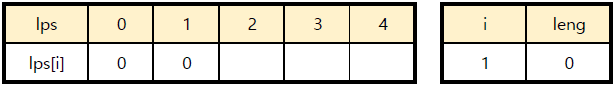

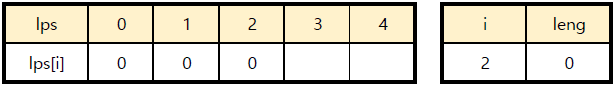

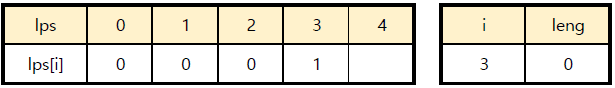

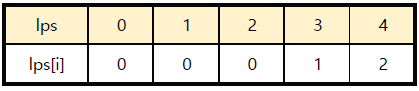

이게 무슨 말이냐면, 만일 주어진 pattern이 ABXAA였다면 pat[4] != pat[1]이지만 leng != 0이므로 두 번째 if 문에 해당하게 됩니다. 여기서 leng = lps[leng-1] 때문에 leng = 0이 됩니다. 인덱스를 증가시키지 않았으므로 다시 while문으로 돌아오게 되고, pat[4] == pat[0]을 검사하게 되고, 참이므로 leng = 1, lps[4]=1이 됩니다.

## [KMP Search]
KMP 알고리즘은 LPS 배열을 만드는 과정과 굉장히 비슷합니다. 일단 아까 만들어준 LPS 배열을 여기 박아놓고 시작합시다.
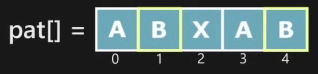

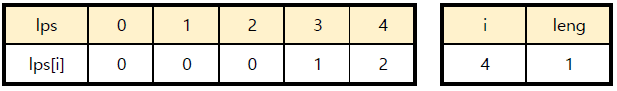

In [ ]:
def KMPSearch (pat, txt) :
  m = len(pat)
  n = len(txt)

  lps = [0] * m # pattern의 lps
  computeLPS(pat, lps)

  i = 0 # index for txt
  j = 0 # index for pat
  while i < n :
    # 문자열이 같은 경우 양쪽 인덱스를 모두 증가시킨다.
    if pat[j] == txt[i] :
      i += 1
      j += 1
    # patter을 찾지 못한 경우
    elif pat[j] != txt[i] :
      # j != 0인 경우는 짧은 lps에 대해 재검사
      if j != 0 :
        j = lps[j-1]
      # j == 0이면 일치하는 부분이 없으므로 인덱스 증가
      else :
        i += 1
    
    # Pattern을 찾은 경우
    if j == m :
      print("found pattern at index " + str(i-j))
      # 이전 인덱스의 lps 값을 참조하여 계속 검색
      j = lps[j-1]


In [ ]:
s = input()
p = input()

sPoint = 0
pPoint = 0

while sPoint < len(s) and pPoint < len(p) :
  if s[sPoint] == p[pPoint] : # 둘이 같은 문자인 경우
    pPoint += 1
    sPoint += 1
  else : # 둘이 같은 문자가 아닌 경우
    if pPoint == 0 : sPoint += 1
    pPoint = 0

print(1) if pPoint == len(p) else print(0)

In [15]:
def computeLPS (pattern, lps) :
    length = 0
    
    i = 1
    while i < len(pattern) :
        if pattern[i] == pattern[length] :
            length += 1
            lps[i] = length
            i += 1
        else :
            if length != 0 :
                length = lps[length - 1]
            else :
                lps[i] = 0
                i += 1
                
def KMPSearch (pattern, text) :
    m = len(pattern)
    n = len(text)
    
    lps = [0] * m
    computeLPS(pattern, lps)
    
    i = 0
    j = 0
    while i < n :
        if pattern[j] == text[i] :
            i += 1
            j += 1
        elif pattern[j] != text[i] :
            if j != 0 :
                j = lps[j-1]
            else :
                i += 1
        if j == m :
            print(1)
            return
    print(0)
 
s = input()
p = input()
KMPSearch(p, s)

baekjoon
baekjoon
1
